In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def specific_differences(lst,fps):
    #falta chequear que sean pares las listas
    return np.sum([(lst[i+1] - lst[i])/fps for i in range(0, len(lst)-1, 2)])
pt = 'C:/Users/54115/Desktop/Doctorado/ARCHIVOS/4 obj BEH/Archivos/'
path = ['logfile_zoe_4obj_obj_s2',
        'logfile_rolo_4obj_obj_beh_s2',
        'logfile_doris_4obj_s2',
        'logfile_Sesion_2_2022_12_06']

dict_result = []
for m in path:
    f = open(pt + m,'r')

    lines = [i for i in f.read().splitlines()]

    fps = int(float(lines[7]))
    nof = int(float(lines[10]))
    datos = eval(lines[-1])

    differences_dict_seg = {key: specific_differences(value,fps) for key, value in datos.items()}

    keys = list(differences_dict_seg.keys())
    values = list(differences_dict_seg.values())
    dict_result.append(differences_dict_seg)
    #plt.figure(figsize=(8, 4))
    #plt.bar(keys, values)#, color=['blue', 'green', 'red', 'purple'])
    #plt.xlabel('Objeto')
    #plt.ylabel('Tiempo Exploracion [s]')
    #plt.show()

{'cerA': 14.283333333333335, 'cerB': 16.799999999999997, 'lej1': 17.46666666666667, 'lej2': 10.333333333333334}
{'lej1': 8.766666666666666, 'cerA': 22.066666666666666, 'lej2': 15.183333333333334, 'cerB': 14.5}
{'lej1': 18.433333333333334, 'cerA': 10.716666666666669, 'lej2': 10.383333333333335, 'cerB': 11.549999999999997}
{'lej1': 7.966666666666667, 'cerA': 10.233333333333333, 'lej2': 19.6, 'cerB': 9.366666666666665}


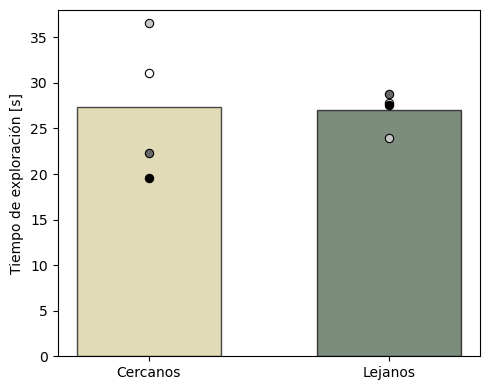

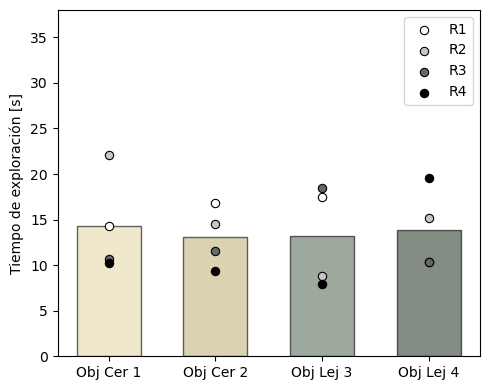

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = dict_result
df = pd.DataFrame(data)

df['sum_cer'] = df['cerA'] + df['cerB']
df['sum_lej'] = df['lej1'] + df['lej2']
mean_cer = df['sum_cer'].mean()
mean_lej = df['sum_lej'].mean()

def generate_greyscale_colors(num_points):
    cmap = plt.cm.Greys  
    return [cmap(i / (num_points - 1)) for i in range(num_points)]


greys_cer = generate_greyscale_colors(len(df))
greys_lej = generate_greyscale_colors(len(df))


plt.figure(figsize=(5, 4))
x_positions = [0, 1]
plt.bar(x_positions, [mean_cer, mean_lej], color=['#D6CC99', '#445D48'], width=0.6, edgecolor='black', alpha=0.7)


for i, value in enumerate(df['sum_cer']):
    plt.scatter(0, value, color=greys_cer[i], edgecolor='black', linewidth=0.8, zorder=5)
for i, value in enumerate(df['sum_lej']):
    plt.scatter(1, value, color=greys_lej[i], edgecolor='black', linewidth=0.8, zorder=5)

plt.xticks(x_positions, ['Cercanos', 'Lejanos'])
plt.ylabel("Tiempo de exploración [s]")
plt.ylim(0, 38)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
mean_cer1 = df['cerA'].mean()
mean_lej1 = df['lej1'].mean()
mean_cer2 = df['cerB'].mean()
mean_lej2 = df['lej2'].mean()
x_positions = [0, 1, 2, 3]
plt.bar(x_positions, [mean_cer1, mean_cer2, mean_lej1, mean_lej2], color=['#E6D9AA', '#C4B483', '#5A705A', '#2F4030'], width=0.6, edgecolor='black', alpha=0.6)


greys_cerA = generate_greyscale_colors(len(df))
greys_cerB = generate_greyscale_colors(len(df))
greys_lej1 = generate_greyscale_colors(len(df))
greys_lej2 = generate_greyscale_colors(len(df))
labels = ['R1', 'R2', 'R3', 'R4']
for i, value in enumerate(df['cerA']):
    plt.scatter(0, value, color=greys_cerA[i], edgecolor='black', linewidth=0.8, zorder=6,label = labels[i])
for i, value in enumerate(df['cerB']):
    plt.scatter(1, value, color=greys_cerB[i], edgecolor='black', linewidth=0.8, zorder=6)
for i, value in enumerate(df['lej1']):
    plt.scatter(2, value, color=greys_lej1[i], edgecolor='black', linewidth=0.8, zorder=6)
for i, value in enumerate(df['lej2']):
    plt.scatter(3, value, color=greys_lej2[i], edgecolor='black', linewidth=0.8, zorder=6)

plt.xticks(x_positions, ['Obj Cer 1', 'Obj Cer 2', 'Obj Lej 3', 'Obj Lej 4'])
plt.ylabel("Tiempo de exploración [s]")
plt.ylim(0, 38)
plt.legend()
plt.tight_layout()
plt.show()


17729


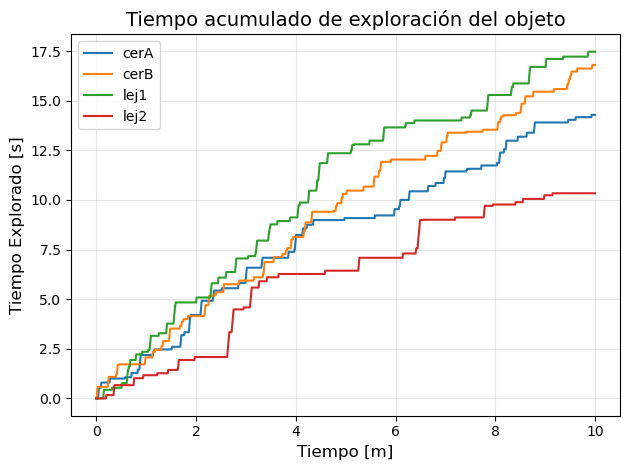

17708


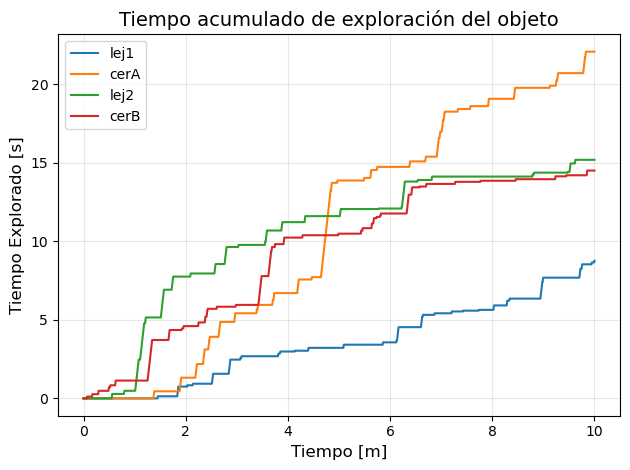

17763


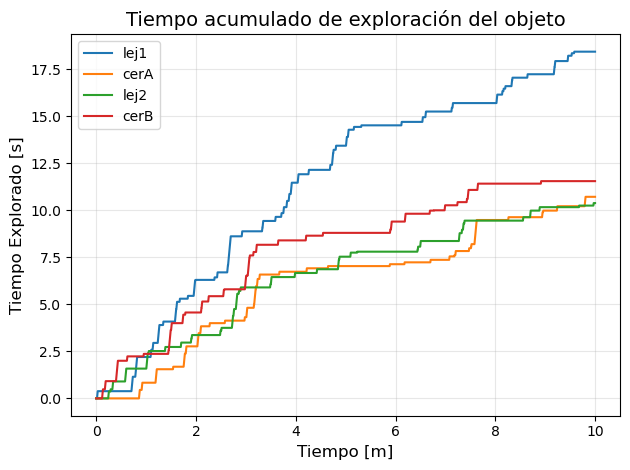

8937


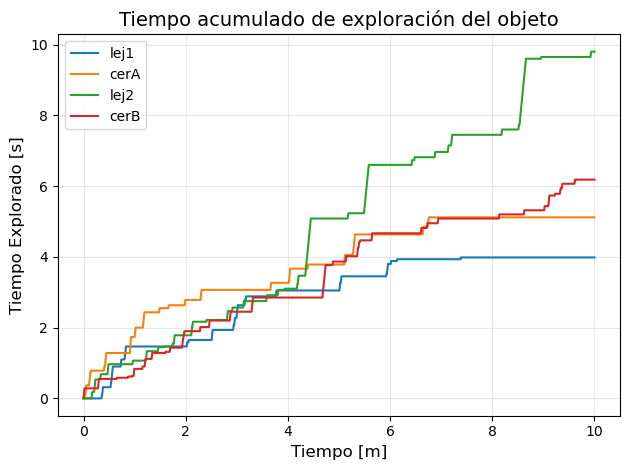

In [47]:
%matplotlib inline
for m in path:
    f = open(pt+ m,'r')

    lines = [i for i in f.read().splitlines()]

    fps = int(float(lines[7]))
    
    nof = int(float(lines[10]))
    print(nof)
    datos = eval(lines[-1])

    for key, value in datos.items():
        frames = datos[key]
        total_frames = nof
        cumulative_time = np.zeros(total_frames)

        # Rellenar el tiempo acumulado para cada intervalo
        for i in range(0, len(frames), 2):
            start = frames[i]       # Frame de inicio
            end = frames[i + 1]     # Frame de fin
            cumulative_time[start:end] += 1  # Sumar 1 en cada frame del intervalo

        # Calcular el tiempo acumulado
        cumulative_time = np.cumsum(cumulative_time)/60#/np.cumsum(cumulative_time)[-1]
        plt.plot(np.linspace(0,10,total_frames), cumulative_time, label=key)
        #plt.plot(np.arange(0,total_frames), cumulative_time, label=key)

    plt.xlabel("Tiempo [m]", fontsize=12)
    plt.ylabel("Tiempo Explorado [s]", fontsize=12)
    plt.title("Tiempo acumulado de exploración del objeto", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


17708


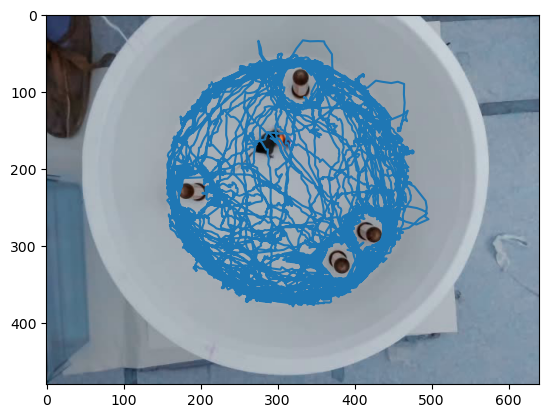

: 

In [ ]:
import pandas as pd
import cv2
path = 'c:/Users/54115/Desktop/Doctorado/ARCHIVOS/Rolo - Tesis/4 obj/obj/rolo_4obj_obj_beh_s2DLC_resnet50_FalconAzulesJan29shuffle1_400000.csv'

cap = cv2.VideoCapture('c:/Users/54115/Desktop/Doctorado/ARCHIVOS/4 obj BEH/rolo_4obj_obj_beh_s2.avi')
        
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
time =  int(frame_count/fps)
ret, frame = cap.read()
plt.imshow(frame)

df = pd.read_csv(path, header=[1,2], index_col=0)
bdp = df.columns[0][0]

plt.plot(df[bdp]['x'],df[bdp]['y'])

In [ ]:
, 857, 863, 1091, 1107, 1302, 1309, 1416, 1417, 1552, 1557, 1580, 1594, 1884, 1899, 1905, 1913, 2149, 2152, 2509, 2524, 2599, 2605, 2793, 2804, 3196, 3206, 3396, 3405, 3516, 3518, 3732, 3740, 3747, 3761, 3878, 3975, 4619, 4625, 4631, 4634, 4906, 4984, 4987, 4991, 5739, 5747, 5785, 5790, 6142, 6151, 6372, 6383, 6430, 6448, 7311, 7320, 7607, 7615, 7626, 7738, 8002, 8005, 8868, 8877]